$$TALLER.$$ 
$$27/08/2021$$

$$Johan Sebastian Palacios, Andres Castaño Velasquez, Bryan Valencia$$

In [ ]:
from sympy.solvers import solve_linear_system #Para resolver el sistema lineal
from sympy import Symbol #Para definir los simbolos
import sympy as sym 
from scipy.signal import lti 
from scipy.fftpack import fft, fftfreq, fftshift #Transformada, frecuencias y centrado
import matplotlib.pyplot as plt #Para graficar
from scipy import signal
from scipy.integrate import cumtrapz #Para integrar con el metodo de trapecios acumulando
import numpy as np
import matplotlib.pyplot as plt
from sympy.matrices import Matrix #Trabajo con matrices
import warnings
from sympy import Symbol
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

RUIDO BLANCO GAUSSIANO

(0.9976488194616392, -0.004898444100798228, 0.9953031669732023)

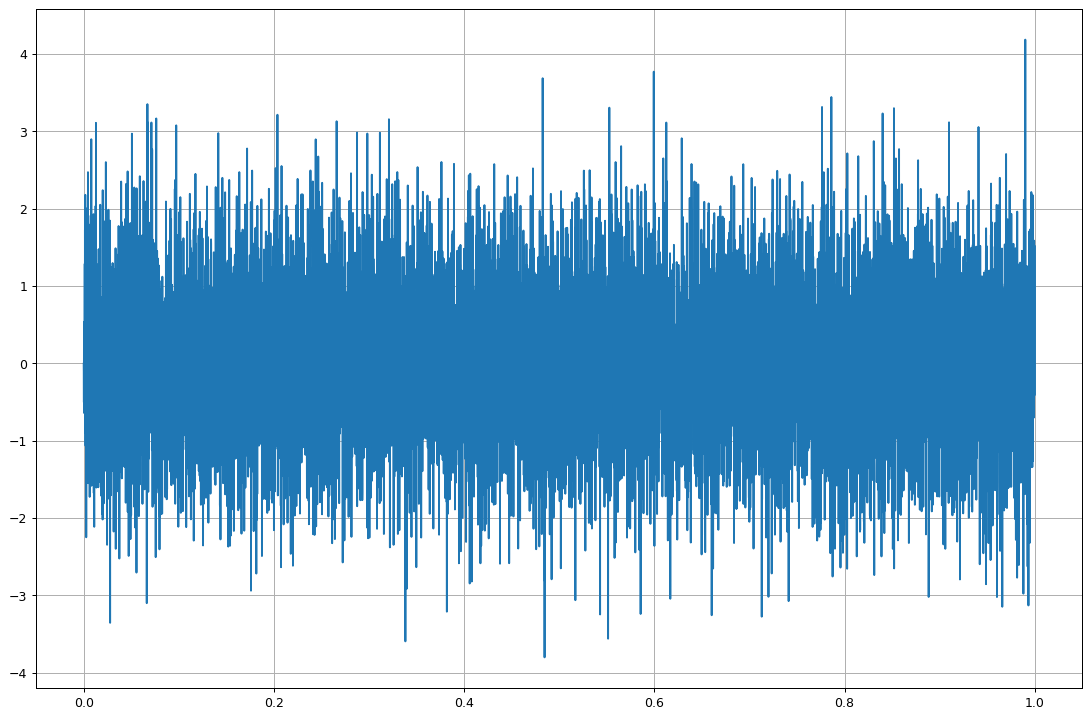

In [ ]:
t = np.linspace(0, 1, 10000)
#np.sqrt(0.1)
ruido = np.random.normal(0,1 , 10000)
plt.figure(figsize=(15,10), dpi=90)# se grafica el pulso rectangular

plt.plot(t, ruido)
plt.grid(True)
std=np.std(ruido)
me=np.mean(ruido)
va=np.var(ruido)
std, me, va

Histograma

Text(0, 0.5, 'Amplitude')

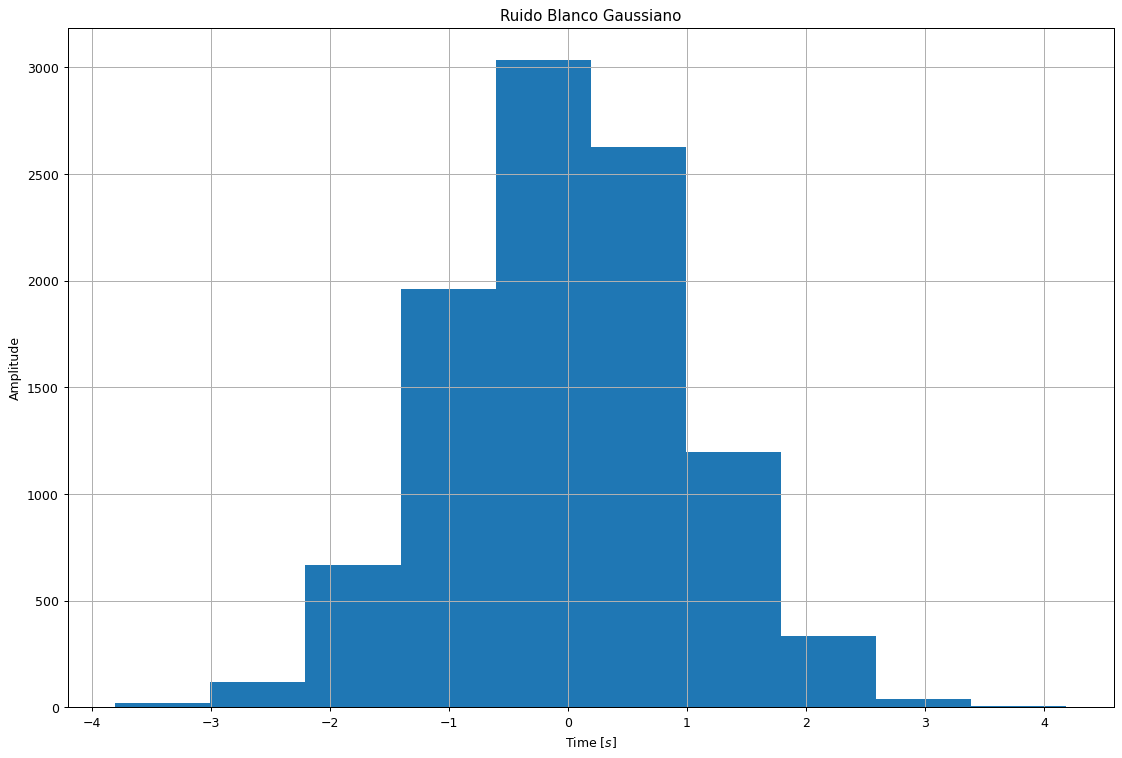

In [ ]:
import seaborn as sns, numpy as np
plt.figure(figsize=(15,10), dpi=90)
#sns.distplot(ruido, color='b')
plt.hist(ruido)
plt.grid(True)
plt.title("Ruido Blanco Gaussiano")
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude")

SLIT

In [ ]:
from sympy import Symbol
R1 = Symbol('R1')
R2 = Symbol('R2')
C1 = Symbol('C1')

I1 = Symbol('I1')


x = Symbol('x')

jw = Symbol('jw')
Y=I1*((R1*C1*jw+1)/C1*jw)
X=I1*((R1*C1*jw+R2*C1*jw+1)/C1*jw)
H=Y/X
print("funcion de transferencia:")
H

funcion de transferencia:


(C1*R1*jw + 1)/(C1*R1*jw + C1*R2*jw + 1)

In [ ]:
R1=2200
R2=10000#se mueve para ajustar el filtro(la aleatoriedad)
#C1 = 1*10**-3
C1=1*10**-6


num = [-C1*R1, -1] #Lo extraigo de num_coeffs
den = [-C1*R1 -C1*R2, -1]
num, den

([-0.0021999999999999997, -1], [-0.012199999999999999, -1])

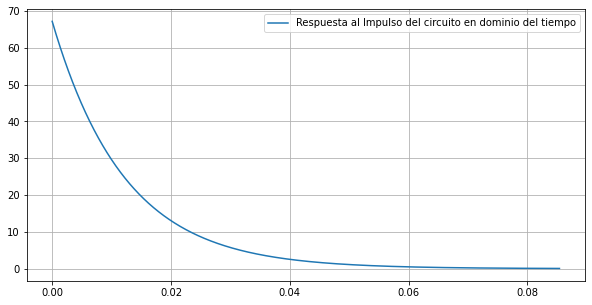

In [ ]:
lti_system = lti(num, den)   #LTI

t5, h = lti_system.impulse(N=2000) 

plt.figure(figsize=(10,5))
plt.plot(t5,h,label='Respuesta al Impulso del circuito en dominio del tiempo')

plt.grid()
plt.legend()

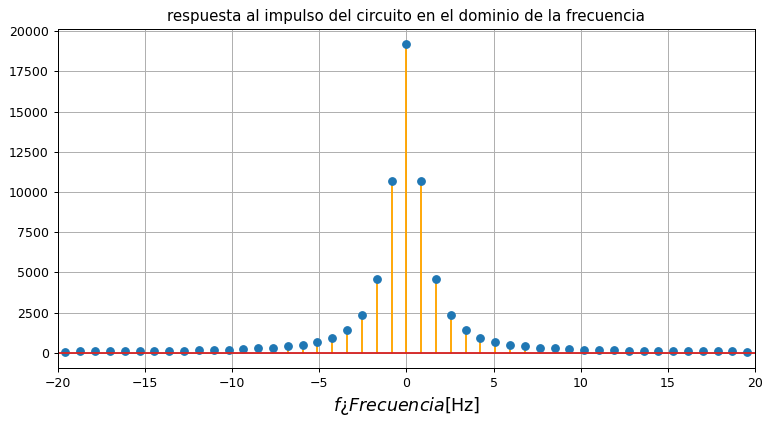

In [ ]:
Fs=1700
vffpr = np.fft.fftfreq(len(h),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(h) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpr,fftsafpr,'orange')
plt.title(r'respuesta al impulso del circuito en el dominio de la frecuencia')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

plt.xlim(-20,20)
plt.grid(True)
plt.show()

Ruido por el SLIT

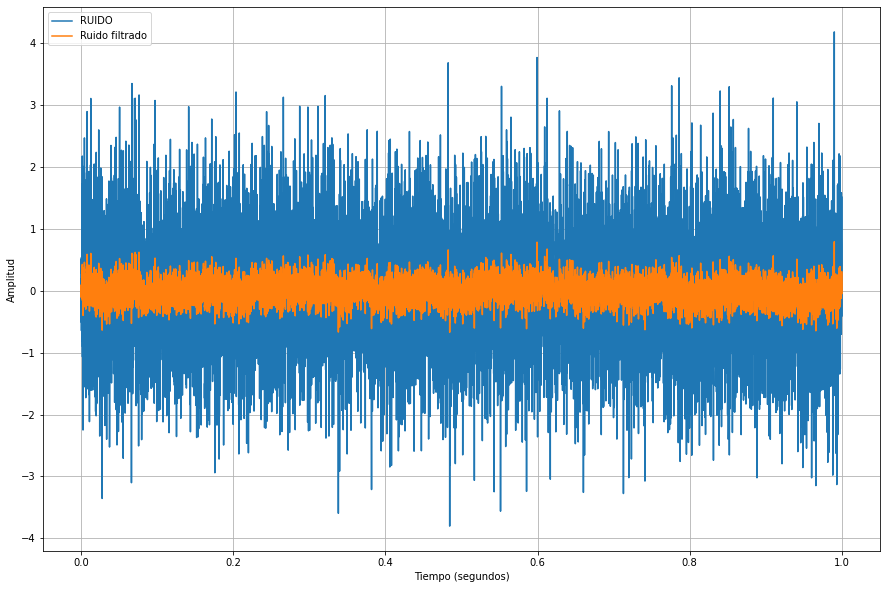

In [ ]:
_,rui,_= lti_system.output(ruido, t)

plt.figure(figsize=(15,10))
plt.plot(t, ruido,label="RUIDO")
plt.plot(t, rui,label="Ruido filtrado")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
#plt.xlim(0, 0.2)
plt.grid()

Espectro de potencia

In [ ]:
from sympy import Symbol
Snw = Symbol('Sn(w)')
No = Symbol('No')
r = Symbol('2')

Hw = Symbol('H(w)')


Rnw = Symbol('Rn(w)')

T = Symbol('T^-1')

J=(No/r)* abs((Hw)) **2
G=T*abs(Snw)
print("espectro de potencia Sn(w):")
J

espectro de potencia Sn(w):


No*Abs(H(w))**2/2

Funcion de correlacion

In [ ]:
print("Funcion de correlacion Rn(w):")
G

Funcion de correlacion Rn(w):


T^-1*Abs(Sn(w))

Espectro de potencia

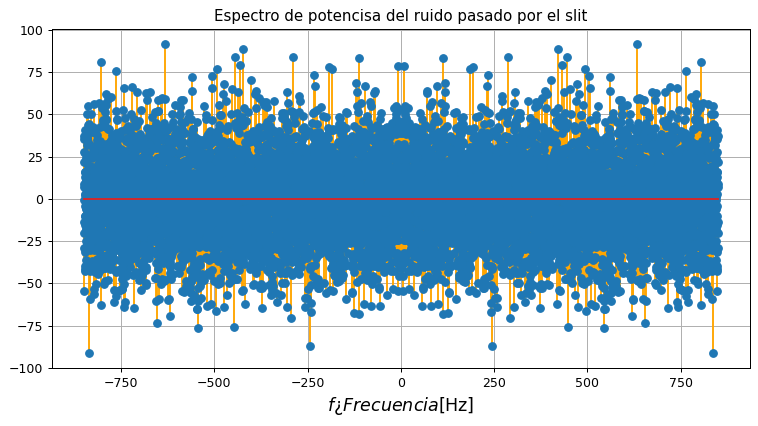

In [ ]:
Fs=1700
vffpr = np.fft.fftfreq(len(rui),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(rui) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpr,fftsafpr/2,'orange')
plt.title(r'Espectro de potencisa del ruido pasado por el slit')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

#plt.xlim(-7,7)
plt.grid(True)
plt.show()

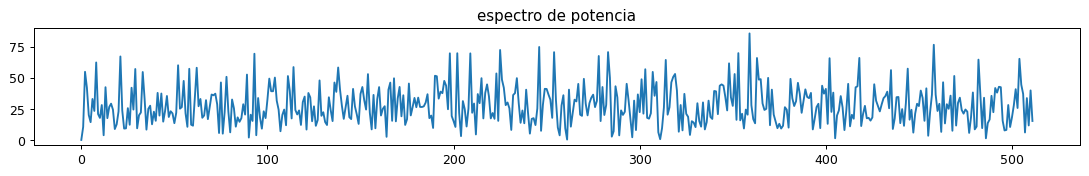

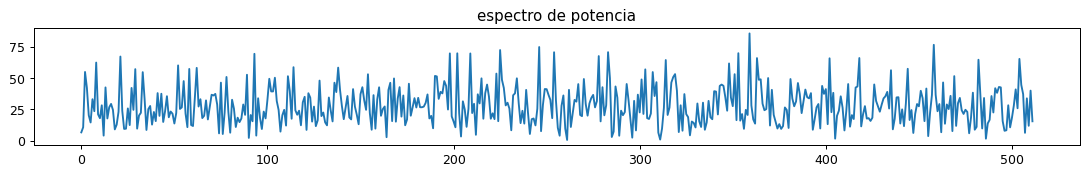

In [ ]:
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Puntos de muestreo
num_fft = 1024;
Y = fft(ruido, num_fft)
Y = abs(Y)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y[:num_fft//2])

media=np.mean(ruido)

var=np.var(ruido)
var, media
ruido1=ruido-media
ruido1
num_fft = 1024;
Y = fft(ruido1, num_fft)
Y = abs(Y)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y[:num_fft//2])

Funcion de correlacion

(-10.0, 10.0)

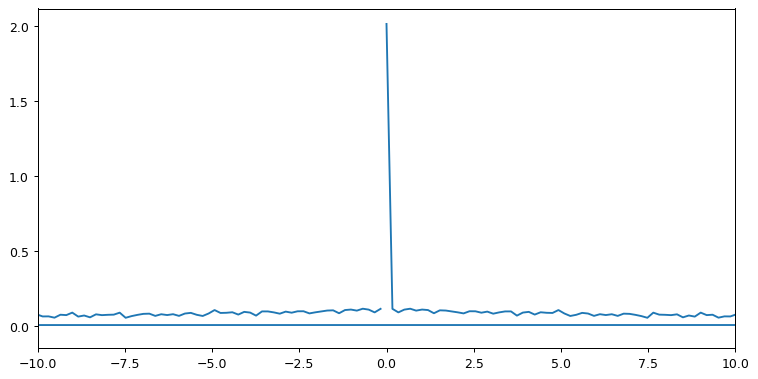

In [ ]:
corui = np.fft.ifft(abs(fftsafpr))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffpr,corui)
plt.xlim(-10,10)
#plt.ylim(0,1)

Promedio de 30 muestras de ruido

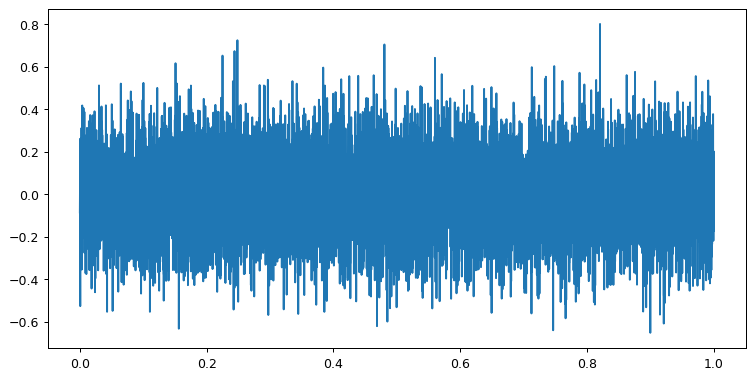

(-0.0008708179849968966, 0.034727184510358694, 0.1863523128656006)

In [ ]:
Rui=0
i=0
while(i<30):
   ruidos = np.random.normal(0,1, 10000)
   Rui=Rui+ruidos
   
   i=i+1
prorui=Rui/i
prorui=prorui
plt.figure(figsize=(10,5), dpi=90)
plt.plot(t,prorui)
plt.show()
med=np.mean(prorui)
vari=np.var(prorui)
stdp=np.std(prorui)
med, vari, stdp

Espectro de potencia

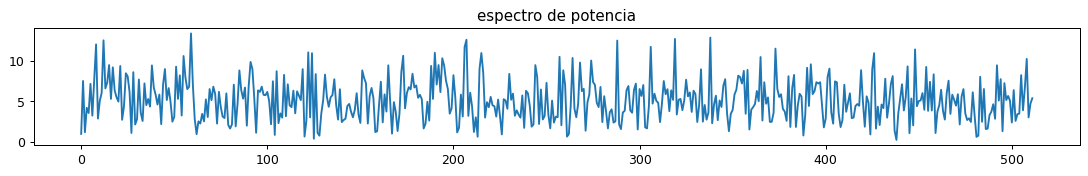

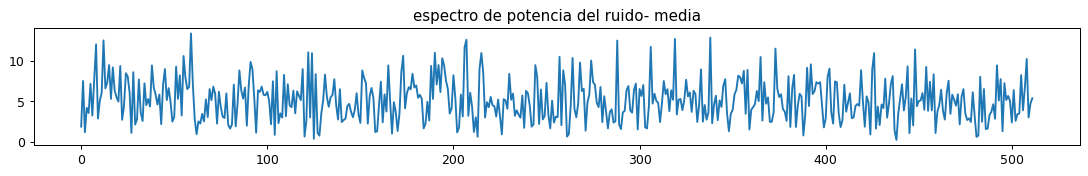

In [ ]:
num_fft = 1024;
Y1 = fft(prorui, num_fft)
Y1 = abs(Y1)
vffpro = np.fft.fftfreq(len(prorui),1/Fs) #calculo vector de frecuencias
fftsafpro= np.fft.fft(prorui) #cálculo FFT
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y1[:num_fft//2])

media=np.mean(prorui)

var=np.var(prorui)

ruido1=prorui-media

num_fft = 1024;
Y2 = fft(ruido1, num_fft)
Y2= abs(Y2)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia del ruido- media')
plt.plot(Y2[:num_fft//2])

Funcion de correlacion

(-10.0, 10.0)

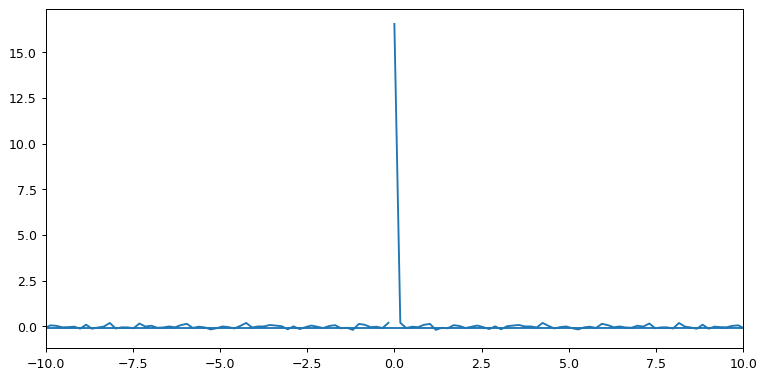

In [ ]:
coruip = np.fft.ifft(abs(fftsafpro))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffpro,coruip)
plt.xlim(-10,10)
#plt.ylim(0,1)

Modulacion AM

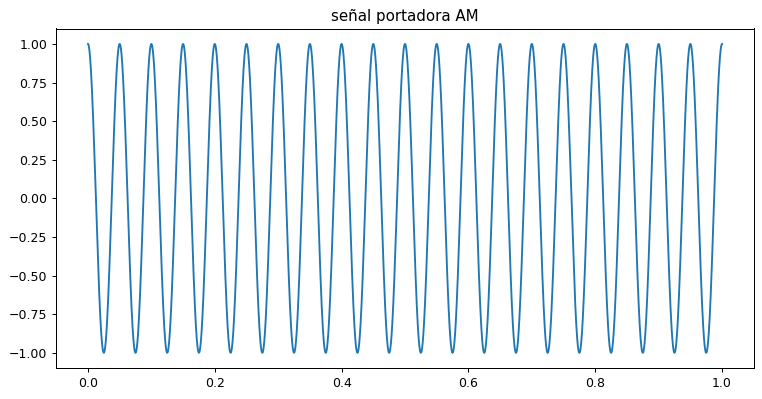

In [ ]:
Ac=1
Fc=20

x=Ac*np.cos(2*np.pi*Fc*t)
plt.figure(figsize=(10,5), dpi=90)
plt.title('señal portadora AM')
plt.plot(t,x)

espectro de portadora

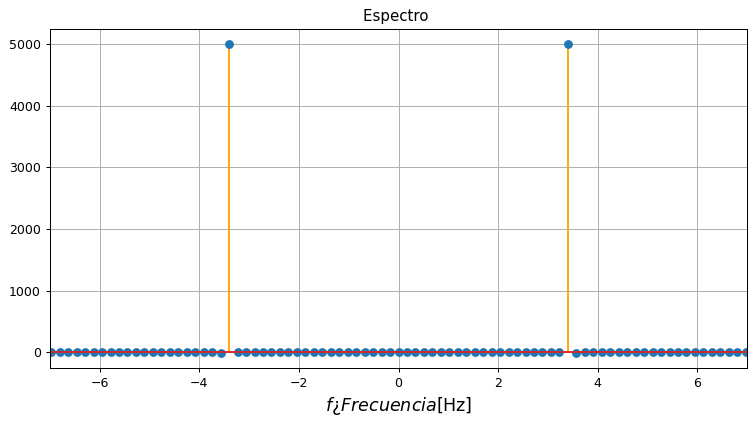

In [ ]:
Fs=1700
vffpam = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
fftsafpam= np.fft.fft(x) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpam,fftsafpam,'orange')
plt.title(r'Espectro ')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

plt.xlim(-7,7)
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


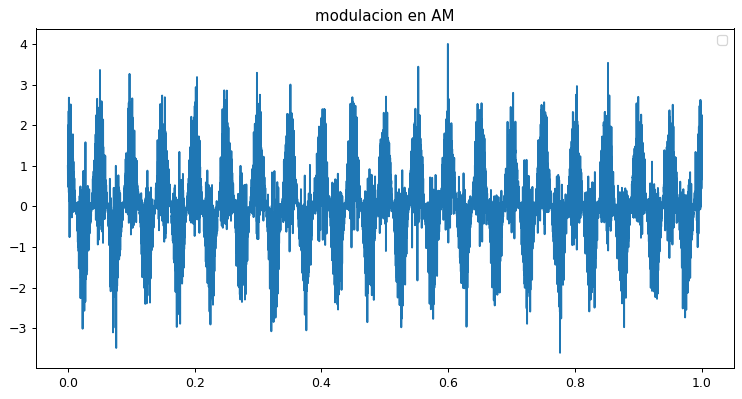

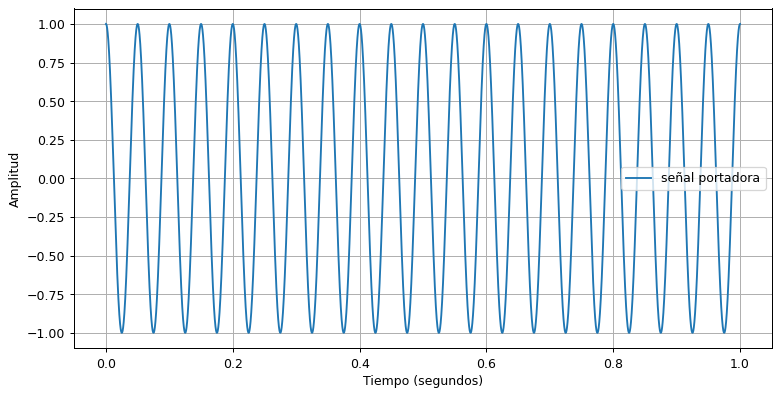

In [ ]:
m=0.8
sn=Ac*(1+m*ruido)*np.cos(2*np.pi*Fc*t)
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en AM')

plt.plot(t,sn)
plt.legend()
plt.figure(figsize=(10,5),dpi=90)
plt.plot(t, x,label="señal portadora")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

Espectro de potencia

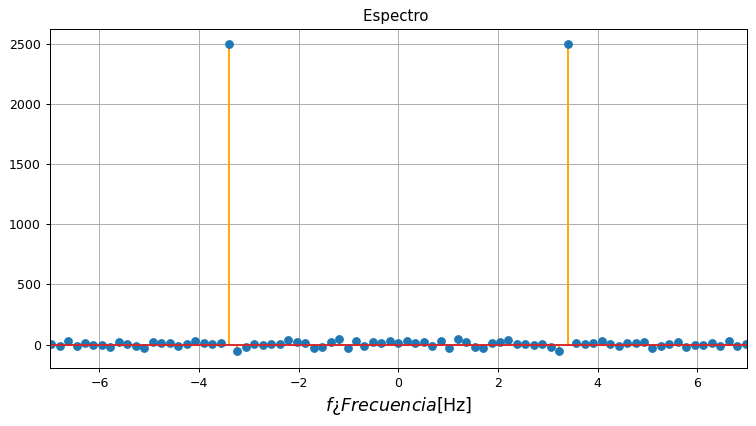

In [ ]:
Fs=1700
vffpram = np.fft.fftfreq(len(sn),1/Fs) #calculo vector de frecuencias
fftsafpram= np.fft.fft(sn) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpram,fftsafpram/2,'orange')
plt.title(r'Espectro ')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

plt.xlim(-7,7)
plt.grid(True)
plt.show()

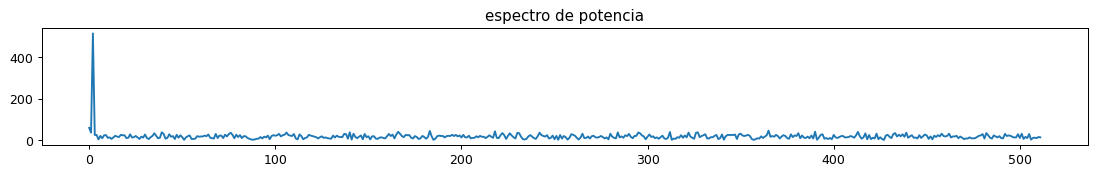

In [ ]:
num_fft = 1024;
Y1 = fft(sn, num_fft)
Y1 = abs(Y1)
vffpam = np.fft.fftfreq(len(sn),1/Fs) #calculo vector de frecuencias
fftsafpam= np.fft.fft(sn) #cálculo FFT
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y1[:num_fft//2])



Funcion de correlacion

(-10.0, 10.0)

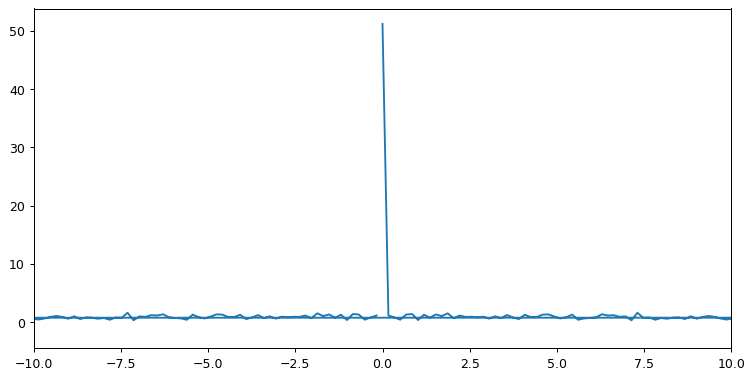

In [ ]:
coruiam = np.fft.ifft(abs(fftsafpam))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffpam,coruiam)
plt.xlim(-10,10)
#plt.ylim(0,1)

modulacion AM del ruido pasado por el slit

No handles with labels found to put in legend.


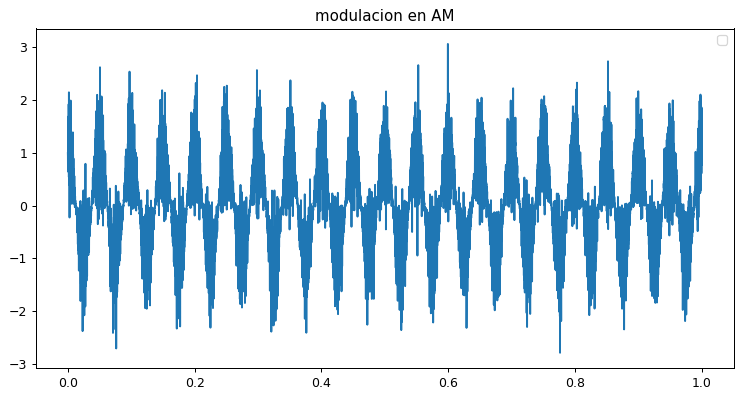

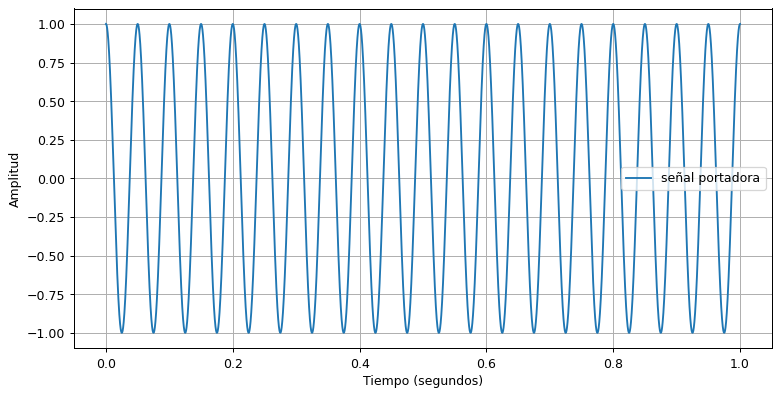

In [ ]:
m=0.8
snr=Ac*(1+m*rui)*np.cos(2*np.pi*Fc*t)
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en AM')

plt.plot(t,snr)
plt.legend()
plt.figure(figsize=(10,5),dpi=90)
plt.plot(t, x,label="señal portadora")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

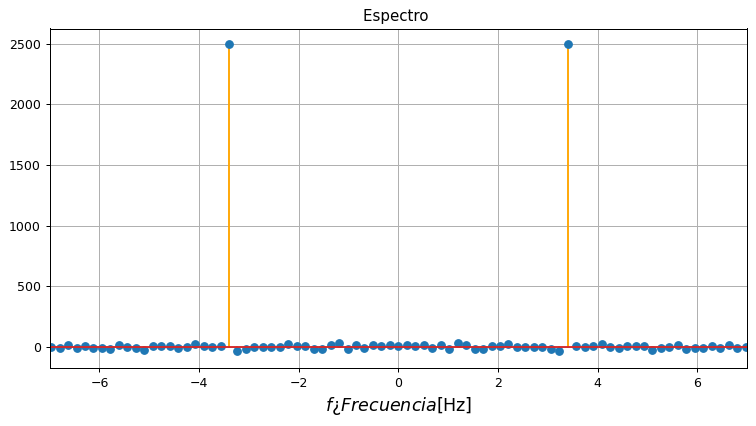

In [ ]:
Fs=1700
vffram = np.fft.fftfreq(len(snr),1/Fs) #calculo vector de frecuencias
fftsafram= np.fft.fft(snr) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffram,fftsafram/2,'orange')
plt.title(r'Espectro ')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

plt.xlim(-7,7)
plt.grid(True)
plt.show()

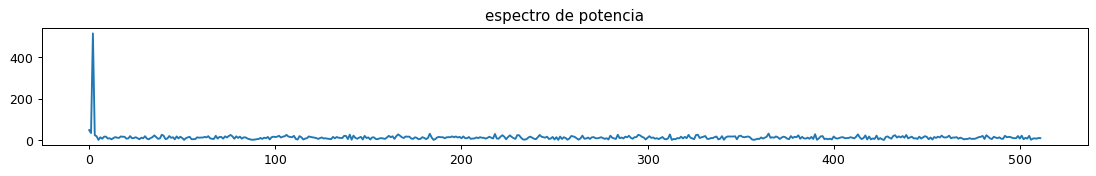

In [ ]:
num_fft = 1024;
Y1 = fft(snr, num_fft)
Y1 = abs(Y1)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y1[:num_fft//2])

(-10.0, 10.0)

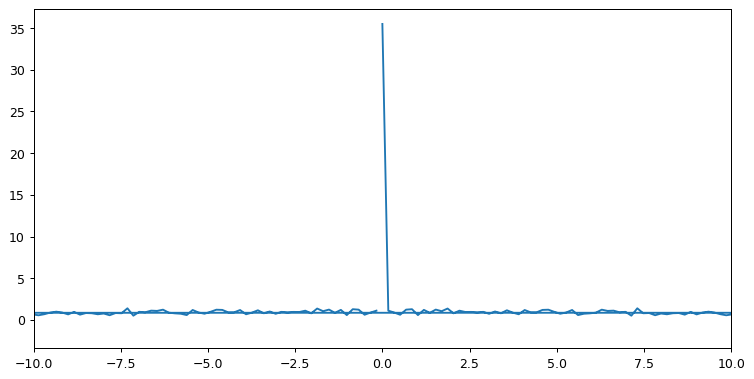

In [ ]:
coruiram = np.fft.ifft(abs(fftsafram))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffram,coruiram)
plt.xlim(-10,10)
#plt.ylim(0,1)

generacion de pulso cuadrado

In [ ]:
def pulse(t, width=0.5):
    width /= 2
    
    
    return t, 1.2247*np.array(np.array((t.mean()-(t.max()*width)) < t, dtype=np.int)) * 1.2247*np.array(t <(t.max()*width+t.mean()), dtype=np.int)

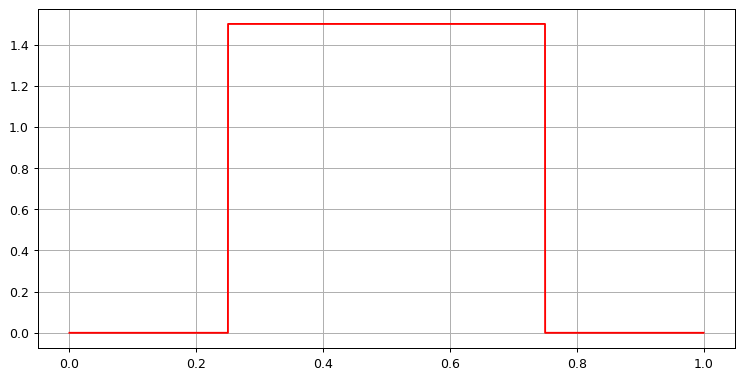

In [ ]:
t1 = np.linspace(0,.4,10000)
t1, pulso = pulse(t1) #entrega dos variables

plt.figure(figsize=(10,5), dpi=90)
plt.plot(t,pulso, 'r')
plt.grid()

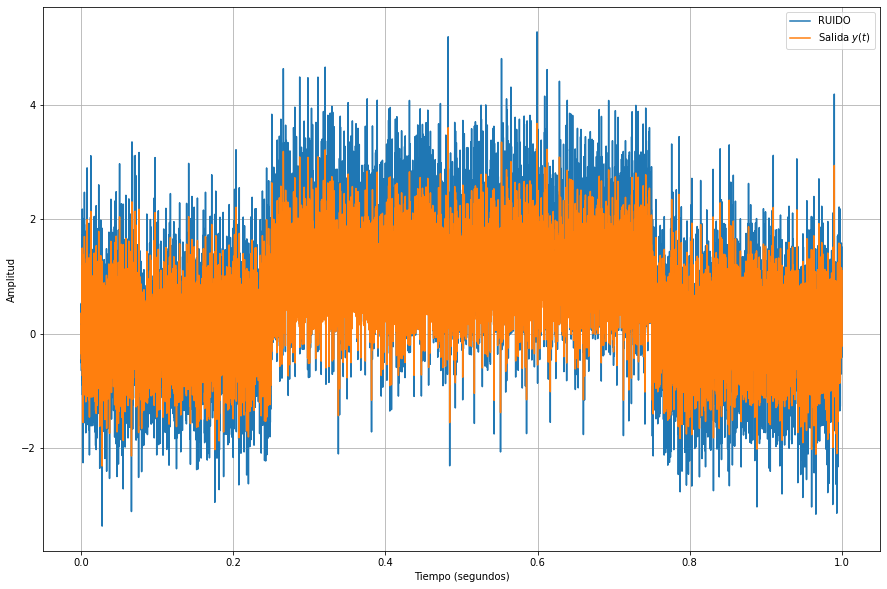

In [ ]:
puln=ruido+pulso
_,pul,_= lti_system.output(puln, t)

plt.figure(figsize=(15,10))
plt.plot(t, puln,label="RUIDO")
plt.plot(t, pul,label="Salida $y(t)$")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

modulacion AM

No handles with labels found to put in legend.


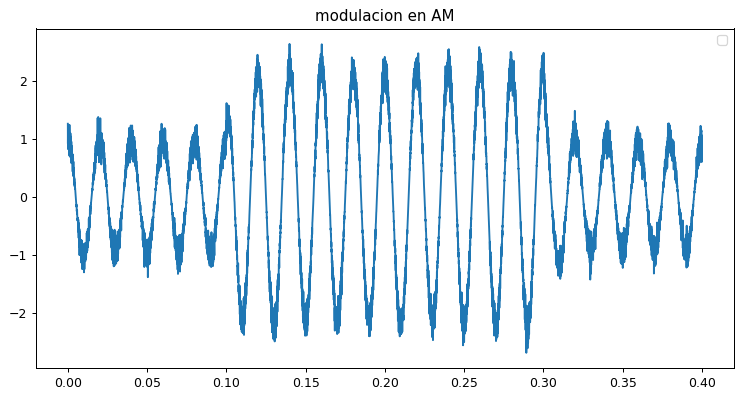

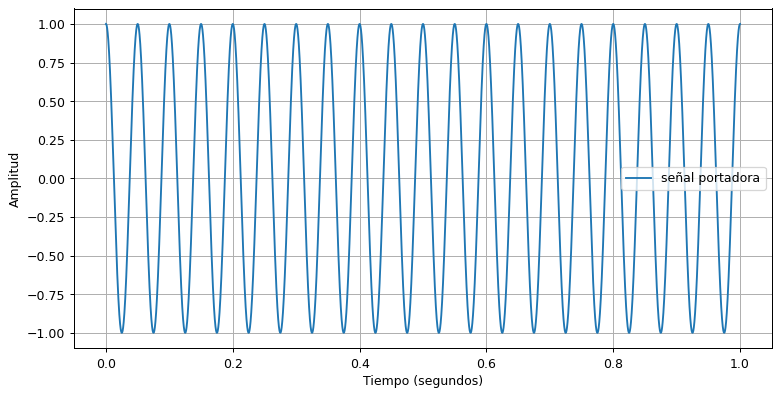

In [ ]:
m=0.8
snrp=Ac*(1+m*pul)*np.cos(2*np.pi*Fc*t)
plt.figure(figsize=(10,5),dpi=90)
plt.title('modulacion en AM')

plt.plot(t1,snrp)
plt.legend()
plt.figure(figsize=(10,5),dpi=90)
plt.plot(t, x,label="señal portadora")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

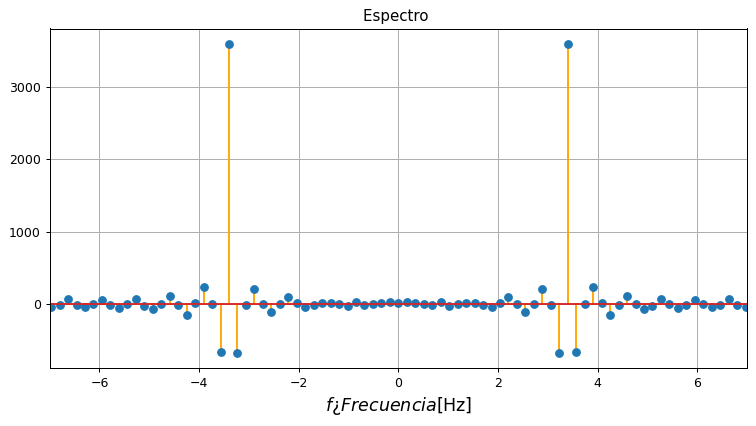

In [ ]:
Fs=1700
vfram = np.fft.fftfreq(len(snrp),1/Fs) #calculo vector de frecuencias
ftsafram= np.fft.fft(snrp) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vfram,ftsafram/2,'orange')
plt.title(r'Espectro ')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

plt.xlim(-7,7)
plt.grid(True)
plt.show()

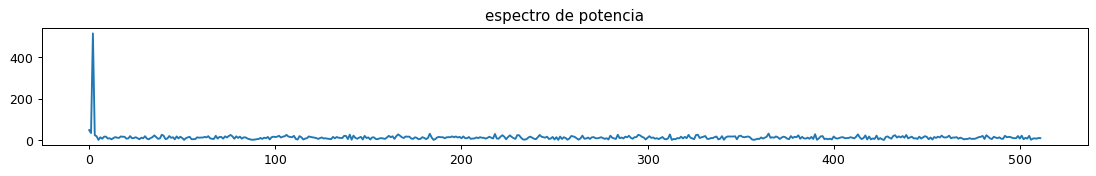

In [ ]:
num_fft = 1024;
Y1 = fft(snrp, num_fft)
Y1 = abs(Y1)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro de potencia')
plt.plot(Y1[:num_fft//2])

(-10.0, 10.0)

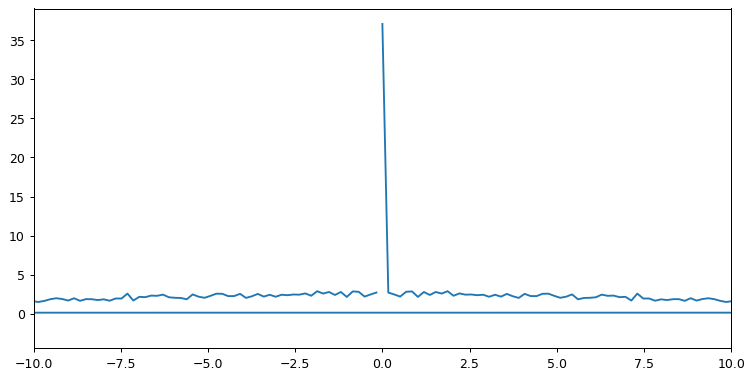

In [ ]:
coruram = np.fft.ifft(abs(ftsafram))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vfram,coruram)
plt.xlim(-10,10)
#plt.ylim(0,1)